# Find the Peak Season and Off Season for the year 2020

In [1]:
 import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

In [2]:
airbnb=pd.read_csv("calendar.csv")
airbnb.columns

airbnb.price =airbnb.price.str.replace('$', '').str.replace(',', '').astype(float).astype(int)
airbnb.price.isna().sum()

<ipython-input-2-894d39eca632>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  airbnb.price =airbnb.price.str.replace('$', '').str.replace(',', '').astype(float).astype(int)


0

In [3]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1185177 entries, 0 to 1185176
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   listing_id      1185177 non-null  int64  
 1   date            1185177 non-null  object 
 2   available       1185177 non-null  object 
 3   price           1185177 non-null  int32  
 4   adjusted_price  1185177 non-null  object 
 5   minimum_nights  1185173 non-null  float64
 6   maximum_nights  1185173 non-null  float64
dtypes: float64(2), int32(1), int64(1), object(3)
memory usage: 58.8+ MB


In [4]:
np.sum(airbnb.isna())


listing_id        0
date              0
available         0
price             0
adjusted_price    0
minimum_nights    4
maximum_nights    4
dtype: int64

In [5]:
airbnb[airbnb.price!=airbnb.adjusted_price]

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,2215762,2021-10-19,t,210,$200.00,2.0,1125.0
1,3781,2021-10-19,f,125,$125.00,32.0,1125.0
2,3781,2021-10-20,t,125,$125.00,32.0,1125.0
3,3781,2021-10-21,t,125,$125.00,32.0,1125.0
4,3781,2021-10-22,t,125,$125.00,32.0,1125.0
...,...,...,...,...,...,...,...
1185172,51589491,2022-10-14,t,86,$86.00,91.0,365.0
1185173,51589491,2022-10-15,t,86,$86.00,91.0,365.0
1185174,51589491,2022-10-16,t,86,$86.00,91.0,365.0
1185175,51589491,2022-10-17,t,86,$86.00,91.0,365.0


In [6]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1185177 entries, 0 to 1185176
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   listing_id      1185177 non-null  int64  
 1   date            1185177 non-null  object 
 2   available       1185177 non-null  object 
 3   price           1185177 non-null  int32  
 4   adjusted_price  1185177 non-null  object 
 5   minimum_nights  1185173 non-null  float64
 6   maximum_nights  1185173 non-null  float64
dtypes: float64(2), int32(1), int64(1), object(3)
memory usage: 58.8+ MB


In [7]:
airbnb.listing_id.nunique()

3247

In [8]:
airbnb['adjusted_price'] = airbnb['adjusted_price'].str.replace(',', '')
airbnb['adjusted_price'] = airbnb['adjusted_price'].str.replace('$', '')
airbnb['adjusted_price'] =airbnb['adjusted_price'].astype(float)

<ipython-input-8-9da6fd5f39e0>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  airbnb['adjusted_price'] = airbnb['adjusted_price'].str.replace('$', '')


In [9]:
airbnb

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,2215762,2021-10-19,t,210,200.0,2.0,1125.0
1,3781,2021-10-19,f,125,125.0,32.0,1125.0
2,3781,2021-10-20,t,125,125.0,32.0,1125.0
3,3781,2021-10-21,t,125,125.0,32.0,1125.0
4,3781,2021-10-22,t,125,125.0,32.0,1125.0
...,...,...,...,...,...,...,...
1185172,51589491,2022-10-14,t,86,86.0,91.0,365.0
1185173,51589491,2022-10-15,t,86,86.0,91.0,365.0
1185174,51589491,2022-10-16,t,86,86.0,91.0,365.0
1185175,51589491,2022-10-17,t,86,86.0,91.0,365.0


In [10]:
airbnb[airbnb.listing_id==3781]

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
1,3781,2021-10-19,f,125,125.0,32.0,1125.0
2,3781,2021-10-20,t,125,125.0,32.0,1125.0
3,3781,2021-10-21,t,125,125.0,32.0,1125.0
4,3781,2021-10-22,t,125,125.0,32.0,1125.0
5,3781,2021-10-23,t,125,125.0,32.0,1125.0
...,...,...,...,...,...,...,...
922,3781,2022-10-14,f,150,150.0,32.0,1125.0
923,3781,2022-10-15,f,150,150.0,32.0,1125.0
924,3781,2022-10-16,f,125,125.0,32.0,1125.0
925,3781,2022-10-17,f,125,125.0,32.0,1125.0


In [11]:
cal2022 = airbnb[~airbnb['date'].str.contains("2021")].reset_index(drop=True)

In [12]:
cal2022

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,77691,2022-01-01,f,300,300.0,91.0,365.0
1,77691,2022-01-02,f,300,300.0,91.0,365.0
2,77691,2022-01-03,f,300,300.0,91.0,365.0
3,77691,2022-01-04,f,300,300.0,91.0,365.0
4,77691,2022-01-05,f,300,300.0,91.0,365.0
...,...,...,...,...,...,...,...
945563,51589491,2022-10-14,t,86,86.0,91.0,365.0
945564,51589491,2022-10-15,t,86,86.0,91.0,365.0
945565,51589491,2022-10-16,t,86,86.0,91.0,365.0
945566,51589491,2022-10-17,t,86,86.0,91.0,365.0


In [13]:
cal2022['date'] = cal2022.date.str.replace(r'(^.*2022-01-.*$)', 'january')
cal2022['date'] = cal2022.date.str.replace(r'(^.*2022-02-.*$)', 'february')
cal2022['date'] = cal2022.date.str.replace(r'(^.*2022-03-.*$)', 'march')
cal2022['date'] = cal2022.date.str.replace(r'(^.*2022-04-.*$)', 'april')
cal2022['date'] = cal2022.date.str.replace(r'(^.*2022-05-.*$)', 'may')
cal2022['date'] = cal2022.date.str.replace(r'(^.*2022-06-.*$)', 'june')
cal2022['date'] = cal2022.date.str.replace(r'(^.*2022-07-.*$)', 'july')
cal2022['date'] = cal2022.date.str.replace(r'(^.*2022-08-.*$)', 'august')
cal2022['date'] = cal2022.date.str.replace(r'(^.*2022-09-.*$)', 'septemer')
cal2022['date'] = cal2022.date.str.replace(r'(^.*2022-10-.*$)', 'october')
cal2022['date'] = cal2022.date.str.replace(r'(^.*2022-11-.*$)', 'november')
cal2022['date'] = cal2022.date.str.replace(r'(^.*2022-12-.*$)', 'december')

<ipython-input-13-85612300ede1>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  cal2022['date'] = cal2022.date.str.replace(r'(^.*2022-01-.*$)', 'january')
<ipython-input-13-85612300ede1>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  cal2022['date'] = cal2022.date.str.replace(r'(^.*2022-02-.*$)', 'february')
<ipython-input-13-85612300ede1>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  cal2022['date'] = cal2022.date.str.replace(r'(^.*2022-03-.*$)', 'march')
<ipython-input-13-85612300ede1>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  cal2022['date'] = cal2022.date.str.replace(r'(^.*2022-04-.*$)', 'april')
<ipython-input-13-85612300ede1>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  cal2022['date'] = cal2022.date.str.replace(r'(^.

In [14]:
cal2022

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,77691,january,f,300,300.0,91.0,365.0
1,77691,january,f,300,300.0,91.0,365.0
2,77691,january,f,300,300.0,91.0,365.0
3,77691,january,f,300,300.0,91.0,365.0
4,77691,january,f,300,300.0,91.0,365.0
...,...,...,...,...,...,...,...
945563,51589491,october,t,86,86.0,91.0,365.0
945564,51589491,october,t,86,86.0,91.0,365.0
945565,51589491,october,t,86,86.0,91.0,365.0
945566,51589491,october,t,86,86.0,91.0,365.0


In [15]:
del cal2022["price"]
del cal2022["available"]
del cal2022["minimum_nights"]
del cal2022["maximum_nights"]

In [16]:
airbnb.date.value_counts().sort_index()


2021-10-19    2579
2021-10-20    3246
2021-10-21    3247
2021-10-22    3247
2021-10-23    3247
              ... 
2022-10-16    3247
2022-10-17    3247
2022-10-18    3247
2022-10-19     690
2022-10-20       1
Name: date, Length: 367, dtype: int64

In [17]:
month_price_avg = cal2022.groupby(['date']).mean()['adjusted_price']

In [18]:
month_price_avg = month_price_avg.reindex(index=['january', 'february', 'march', 'april', 'may', 'june', 'july',
                                                'august', 'septemer', 'october'])
prices = list(month_price_avg)

In [19]:
month_price_avg.index

Index(['january', 'february', 'march', 'april', 'may', 'june', 'july',
       'august', 'septemer', 'october'],
      dtype='object', name='date')

In [20]:
month_price_avg_df = pd.DataFrame(month_price_avg.index, prices)

In [21]:
month_price_avg_df

,date
179.223859,january
180.757545,february
190.828000,march
203.241967,april
206.573979,may
206.888328,june
209.185601,july
209.936477,august
214.840468,septemer
213.277796,october


In [22]:

month_price_avg_df.reset_index(inplace=True)
month_price_avg_df.columns = ['avg_price', 'month']
# re-ordering the columns

month_price_avg_df = month_price_avg_df[['month', 'avg_price']]
# this is the final dataframe to calculate the peak season and off season

month_price_avg_df

,month,avg_price
0,january,179.223859
1,february,180.757545
2,march,190.828000
3,april,203.241967
4,may,206.573979
5,june,206.888328
6,july,209.185601
7,august,209.936477
8,septemer,214.840468
9,october,213.277796


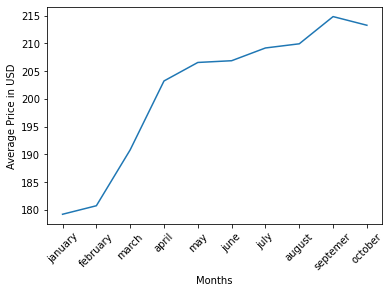

In [23]:
plt.plot(month_price_avg_df.month, month_price_avg_df.avg_price);
plt.xticks(rotation=45);
plt.xlabel("Months");
plt.ylabel("Average Price in USD");

It is evident that April to October is the peak season with average price ranging from $203 to $214 and January to feb are comparatively lower with average price ranging from $179 to $180